Import libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import librosa #library for processing audio
import librosa.display
import IPython.display as ipd

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
debussy_file = "drive/My Drive/MMA/Lab/piano_c.wav"

Play Audio File

In [ ]:
ipd.Audio(debussy_file)

Load Audio File with librosa

In [ ]:
debussy, sr = librosa.load(debussy_file)

Sampling Rate

In [ ]:
print(sr)

22050


In [ ]:
debussy.shape #1-D -> length of numpy array

(33968,)

Duration in seconds of 1 sample

In [ ]:
sample_duration = 1 / sr
print(f"One sample lasts for {sample_duration:6f} seconds")

One sample lasts for 0.000045 seconds


Total number of samples in audio file

In [ ]:
total_samples = len(debussy)
total_samples

33968

Duration of audio

In [ ]:
duration = 1 / sr * total_samples
print(f"The audio lasts for {duration} seconds")

The audio lasts for 1.540498866213152 seconds


Visualising audio signal in the time domain

Text(0.5, 1.0, 'Debussy')

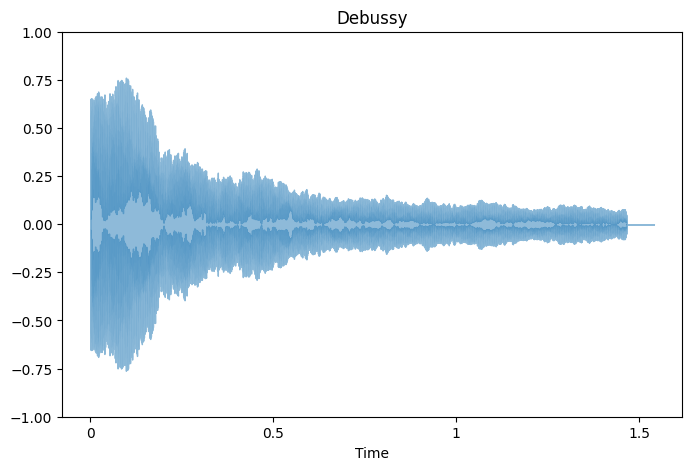

In [ ]:
plt.figure(figsize=(8,5))
librosa.display.waveshow(debussy, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Debussy")

Calculating and visualizing spectogram

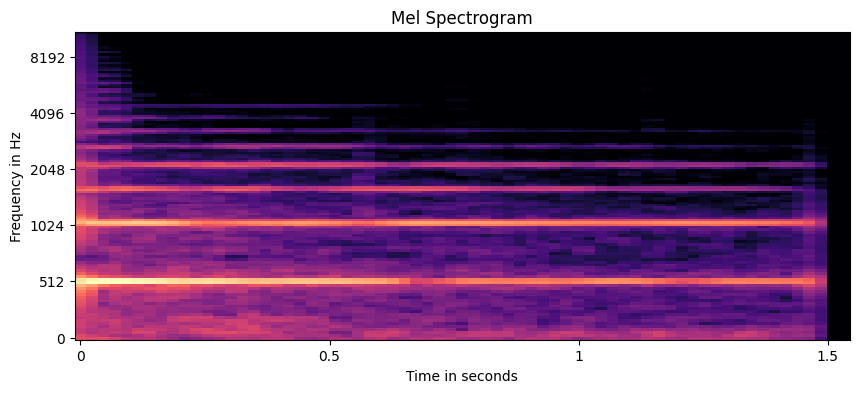

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

spectrogram = librosa.feature.melspectrogram(y=debussy, sr=sr)


spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram')
plt.xlabel('Time in seconds')
plt.ylabel('Frequency in Hz')
plt.show()


Calculate and plotting the log-frequency spectrogram

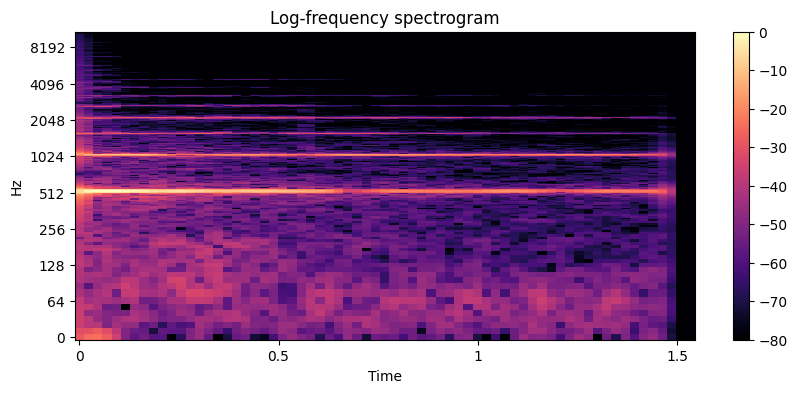

In [ ]:
debussy, sr = librosa.load(debussy_file)

# Compute spectrogram
D = np.abs(librosa.stft(debussy))

# Convert to log scale
log_power = librosa.amplitude_to_db(D, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(log_power, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Log-frequency spectrogram')
plt.show()
